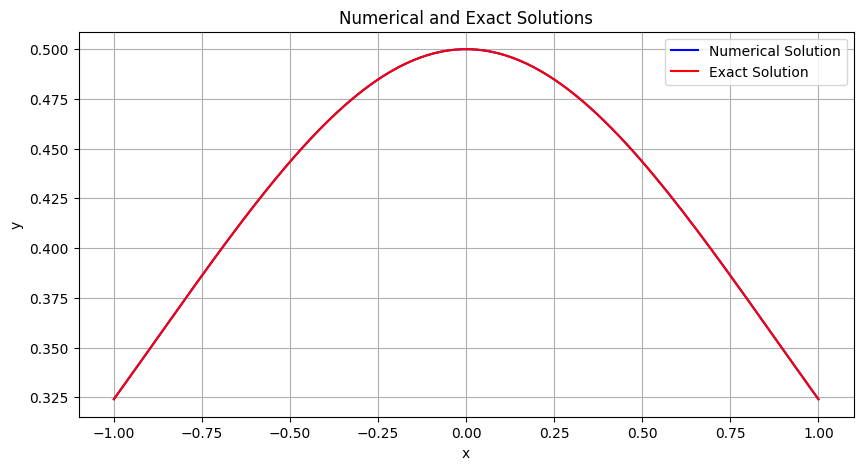

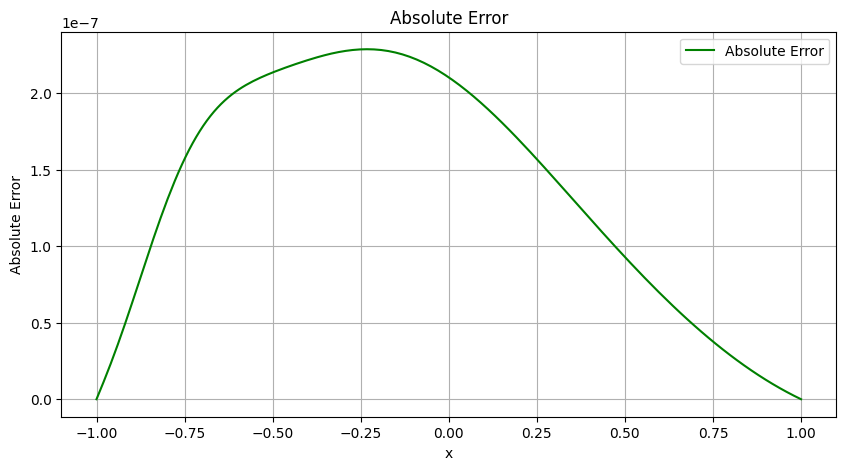

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

# تعریف معادله دیفرانسیل مرتبه دوم برای مسئله مقدار مرزی
def bvp_equation(x, y):
    return np.vstack((y[1], -y[0] + 2 * y[1]**2 / y[0]))

# تعریف شرایط مرزی
def bvp_bc(ya, yb):
    return np.array([ya[0] - (np.exp(-1) + np.exp(1))**-1, yb[0] - (np.exp(-1) + np.exp(1))**-1])

# حدس اولیه برای پارامتر تیراندازی خطی
def initial_guess(x):
    return np.vstack([(np.exp(x) + np.exp(-x))**-1, -np.exp(x) * (np.exp(x) + np.exp(-x))**-3])

# تعریف مقادیر x و حدس اولیه برای پارامتر تیراندازی خطی
x = np.linspace(-1, 1, 100)
y_guess = initial_guess(x)

# حل مسئله مقدار مرزی با استفاده از روش تیراندازی
result = solve_bvp(bvp_equation, bvp_bc, x, y_guess)

# تعریف جواب دقیق
def exact_solution(x):
    return (np.exp(x) + np.exp(-x))**-1

# رسم نمودار جواب تقریبی و دقیق
plt.figure(figsize=(10, 5))
plt.plot(result.x, result.y[0], label='Numerical Solution', color='b')
plt.plot(result.x, exact_solution(result.x), label='Exact Solution', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical and Exact Solutions')
plt.legend()
plt.grid(True)
plt.show()

# محاسبه و رسم خطای مطلق
absolute_error = np.abs(result.y[0] - exact_solution(result.x))
plt.figure(figsize=(10, 5))
plt.plot(result.x, absolute_error, label='Absolute Error', color='g')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.title('Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


# به منظور حل مسئله مقدار مرزی داده شده با استفاده از روش تیراندازی خطی، ابتدا معادله دیفرانسیل مرتبه دوم مربوط به مسئله را به صورت یک سیستم معادلات دیفرانسیلی اول مرتبه تبدیل می‌کنیم. سپس با استفاده از روش تفاضل محدود، این سیستم معادلات را به یک سیستم معادلات جبری تبدیل کرده و آنها را حل می‌کنیم.

# در این پیاده‌سازی پایتون، ما از کتابخانه
#  `scipy`
#  برای حل مسئله مقدار مرزی استفاده می‌کنیم.
#  ابتدا معادله دیفرانسیل مرتبه دوم مسئله و شرایط مرزی را تعریف می‌کنیم.
#  سپس حدس اولیه برای پارامتر تیراندازی خطی را تعریف کرده و با استفاده از تابع
#  `solve_bvp`
#  مسئله را حل می‌کنیم.

# سپس نمودار جواب تقریبی و دقیق را به همراه نمودار خطای مطلق رسم می‌کنیم.
